# Importing of Libraries and checking the versions

In [53]:
from pandas.plotting import scatter_matrix
import pandas
print("pandas {}".format(pandas.__version__))

pandas 1.3.5


In [54]:
import matplotlib.pyplot
import matplotlib
print("matplotlib {}".format(matplotlib.__version__))

matplotlib 3.5.2


In [55]:
from sklearn import model_selection
import sklearn
print("sklearn {}".format(sklearn.__version__))

sklearn 1.0.2


In [57]:
# Import Various Models we are to use
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Data Preprocessing

In [59]:
names = ['distanceCovered', 'Match of Route', 'Fuel Consumption', 'Body Characteristics', 'Equipment Sensors', 'Efficiency', 'Rating']

In [60]:
data_set = pandas.read_csv('truckData.csv', names=names, header=0)
data_set.shape

(74, 7)

In [62]:
data_set.head(20)

,distanceCovered,Match of Route,Fuel Consumption,Body Characteristics,Equipment Sensors,Efficiency,Rating
0,1000,1,2000,1,10,4,High
1,1000,1,2000,1,10,4,High
2,1000,0,2000,1,10,4,lowest
3,1000,1,2000,1,10,4,High
4,800,1,500,2,10,4,Highest
5,700,1,500,2,10,4,Highest
6,900,1,500,2,10,4,Highest
7,650,1,500,2,10,4,Highest
8,300,1,500,2,10,4,Highest
9,2000,1,2500,1,7,4,High


In [63]:
data_set.describe()

,distanceCovered,Match of Route,Fuel Consumption,Body Characteristics,Equipment Sensors,Efficiency
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1887.837838,0.783784,2108.108108,1.135135,6.972973,3.270270
std,808.126991,0.414473,673.725434,0.344201,1.937185,0.447131
min,300.000000,0.000000,500.000000,1.000000,5.000000,3.000000
25%,1500.000000,1.000000,2000.000000,1.000000,5.000000,3.000000
50%,2000.000000,1.000000,2500.000000,1.000000,7.000000,3.000000
75%,2500.000000,1.000000,2500.000000,1.000000,7.000000,4.000000
max,3000.000000,1.000000,2500.000000,2.000000,10.000000,4.000000


In [64]:
data_set.groupby('Rating').size()


Rating
High        8
Highest    10
high       18
low        22
lowest     16
dtype: int64

<AxesSubplot:>

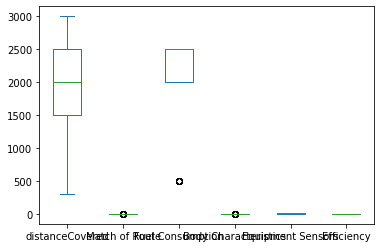

In [65]:
data_set.plot(kind='box', subplots=False, sharex=False, sharey=False)

distanceCovered             AxesSubplot(0.125,0.71587;0.352273x0.16413)
Match of Route           AxesSubplot(0.547727,0.71587;0.352273x0.16413)
Fuel Consumption           AxesSubplot(0.125,0.518913;0.352273x0.16413)
Body Characteristics    AxesSubplot(0.547727,0.518913;0.352273x0.16413)
Equipment Sensors          AxesSubplot(0.125,0.321957;0.352273x0.16413)
Efficiency              AxesSubplot(0.547727,0.321957;0.352273x0.16413)
dtype: object

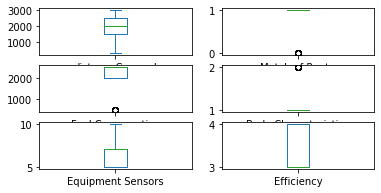

In [66]:
data_set.plot (kind = 'box', subplots = True, layout = (4,2), sharex = False, sharey = False)

array([[<AxesSubplot:title={'center':'distanceCovered'}>,
        <AxesSubplot:title={'center':'Match of Route'}>],
       [<AxesSubplot:title={'center':'Fuel Consumption'}>,
        <AxesSubplot:title={'center':'Body Characteristics'}>],
       [<AxesSubplot:title={'center':'Equipment Sensors'}>,
        <AxesSubplot:title={'center':'Efficiency'}>]], dtype=object)

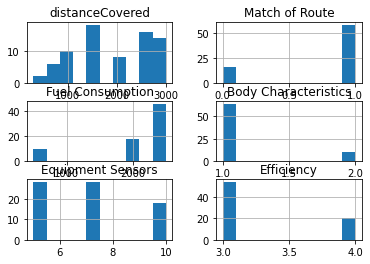

In [67]:
data_set.hist()

array([[<AxesSubplot:xlabel='distanceCovered', ylabel='distanceCovered'>,
        <AxesSubplot:xlabel='Match of Route', ylabel='distanceCovered'>,
        <AxesSubplot:xlabel='Fuel Consumption', ylabel='distanceCovered'>,
        <AxesSubplot:xlabel='Body Characteristics', ylabel='distanceCovered'>,
        <AxesSubplot:xlabel='Equipment Sensors', ylabel='distanceCovered'>,
        <AxesSubplot:xlabel='Efficiency', ylabel='distanceCovered'>],
       [<AxesSubplot:xlabel='distanceCovered', ylabel='Match of Route'>,
        <AxesSubplot:xlabel='Match of Route', ylabel='Match of Route'>,
        <AxesSubplot:xlabel='Fuel Consumption', ylabel='Match of Route'>,
        <AxesSubplot:xlabel='Body Characteristics', ylabel='Match of Route'>,
        <AxesSubplot:xlabel='Equipment Sensors', ylabel='Match of Route'>,
        <AxesSubplot:xlabel='Efficiency', ylabel='Match of Route'>],
       [<AxesSubplot:xlabel='distanceCovered', ylabel='Fuel Consumption'>,
        <AxesSubplot:xlabel='Match of

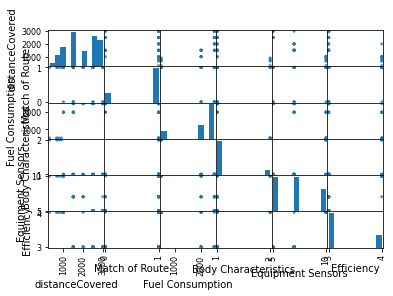

In [68]:
scatter_matrix(data_set)

In [69]:
data_table = data_set.values
data_table[0:20]

array([[1000, 1, 2000, 1, 10, 4, 'High'],
       [1000, 1, 2000, 1, 10, 4, 'High'],
       [1000, 0, 2000, 1, 10, 4, 'lowest'],
       [1000, 1, 2000, 1, 10, 4, 'High'],
       [800, 1, 500, 2, 10, 4, 'Highest'],
       [700, 1, 500, 2, 10, 4, 'Highest'],
       [900, 1, 500, 2, 10, 4, 'Highest'],
       [650, 1, 500, 2, 10, 4, 'Highest'],
       [300, 1, 500, 2, 10, 4, 'Highest'],
       [2000, 1, 2500, 1, 7, 4, 'High'],
       [2000, 1, 2500, 1, 7, 3, 'high'],
       [1500, 1, 2500, 1, 7, 3, 'high'],
       [1500, 1, 2500, 1, 7, 3, 'high'],
       [1500, 0, 2500, 1, 7, 3, 'lowest'],
       [1500, 0, 2000, 1, 7, 3, 'lowest'],
       [1500, 0, 2000, 1, 7, 3, 'lowest'],
       [1500, 1, 2000, 1, 7, 3, 'high'],
       [1500, 1, 2000, 1, 7, 3, 'high'],
       [1500, 1, 2000, 1, 7, 3, 'high'],
       [1500, 1, 2500, 1, 7, 3, 'high']], dtype=object)

## Modeling and Analyzing Data

In [71]:
X = data_table[:,0:6]
Y = data_table[:,6]

In [72]:
X[0:10]


array([[1000, 1, 2000, 1, 10, 4],
       [1000, 1, 2000, 1, 10, 4],
       [1000, 0, 2000, 1, 10, 4],
       [1000, 1, 2000, 1, 10, 4],
       [800, 1, 500, 2, 10, 4],
       [700, 1, 500, 2, 10, 4],
       [900, 1, 500, 2, 10, 4],
       [650, 1, 500, 2, 10, 4],
       [300, 1, 500, 2, 10, 4],
       [2000, 1, 2500, 1, 7, 4]], dtype=object)

In [74]:
test_set_size = 0.20
seed = 6

In [75]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)

In [76]:
scoring = 'accuracy'

In [78]:
models = []

models.append(('Logistic Regression', LogisticRegression(
    solver='lbfgs',  multi_class='ovr')))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neigbors', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Support Vector Machine', SVC(gamma='scale')))
models.append(('Guassian Naive Bayes', GaussianNB()))

In [79]:
results = []
names = []

# Testing the Model to determine the best model to use

In [80]:
for name, model in models:
    names.append(name)
    K_Fold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = model_selection.cross_val_score(
        model, X_train, Y_train, cv=K_Fold, scoring=scoring)
    results.append(cv_results)
    message = "%s:  %f  (%f)" % (name, cv_results.mean(), cv_results.std())
    print(message)


c:\Users\vickj\anaconda3\envs\deepLearning1\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\vickj\anaconda3\envs\deepLearning1\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/

Logistic Regression:  0.916667  (0.170783)
Linear Discriminant Analysis:  0.730000  (0.107961)
K Nearest Neigbors:  0.730000  (0.107961)
CART:  1.000000  (0.000000)
Support Vector Machine:  0.640000  (0.132330)
Guassian Naive Bayes:  0.943333  (0.124766)


# Using the best model to predict the data

In [81]:
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [32]:
# save the model for API

import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Testing and Evaluating the Model

In [82]:
# Check the accuracy of the model
accuracy = model.score(X_test, Y_test)
print("Accuracy: ", accuracy)

Accuracy:  1.0


In [86]:
predictions = model.predict([[800,1,500,2,10,4]])
print(predictions)


['Highest']


In [87]:
print(type(predictions))

<class 'numpy.ndarray'>


In [88]:
distanceCovered = 1500
Match_of_Route = 1
Fuel_Consumption = 2000
Body_Characteristics = 1
Equipment_Sensors = 10 
Efficiency = 4
Rating = 0

new_prediction = model.predict([[distanceCovered, Match_of_Route, Fuel_Consumption, Body_Characteristics, Equipment_Sensors, Efficiency]])

ranking = new_prediction[0]
name_of_truck = 'mercedes'

ranking = name_of_truck + ':' + ' ' + ranking

print(ranking)

print(type(ranking))

mercedes: High
<class 'str'>
